# 第12章 监督学习方法总结


10种监督学习方法总结

|方法| 适用问题|模型特点| 模型类型|学习策略|学习的损失函数|学习算法|
:-:|:-:|:-:|:-:|:-:|:-:|:-:
感知机Peceptron| 二类分类| 分离超平面 | 判别模型|极小化误分类点到超平面距离| 误分类点到超平面距离|随机梯度下降
k近邻法KNN| 多类分类, 回归| 特征空间, 样本点|判别模型|-|-|-
朴素贝叶斯NB|多类分类|特征与类别的联合概率分布, 条件独立假设|生成模型|极大似然估计, 最大后验概率估计| 对数似然损失|概率公式计算,EM算法
决策树DT|多类分类, 回归|分类树, 回归树|判别模型|正则化的极大似然估计|对数似然损失|特征选取, 生成, 减枝
逻辑斯蒂回归与最大熵模型LR, Maxent|多类分类, 回归|特征条件下类别的条件概率分布, 对数线性模型|判别模型|极大似然估计, 正则化的极大似然估计|逻辑斯蒂损失|改进的迭代尺度算法, 梯度下降算法, 拟牛顿法
支持向量机SVM|二类分类|分离超平面, 核技巧| 判别模型|极小化正则化合页损失, 软间隔最大化| 合页损失| 序列最小最优化算法(SMO)
集成学习-提升方法Ensemble Method -AdaBoost|二类分类|弱分类器组合成强学习器|判别模型| 极小化加法模型的指数损失|指数损失|前向分布加法算法
EM算法EM|概率模型参数估计|含隐变量的概率模型|-|极大似然估计, 最大后验概率估计|对数似然损失|迭代算法
隐马尔可夫模型HMM|标注|观测序列与状态序列的联合分布模型|生成模型|极大似然估计, 最大后验概率估计|对数似然损失|概率计算公式, EM算法
条件随机场CRF| 标注|状态序列条件下观测序列的条件分布, 对数线性模型| 判别模型|极大似然估计, 正则化极大似然估计|对数似然损失|改进的迭代尺度算法, 梯度下降算法, 拟牛顿法

### 1 适用问题

监督学习可以认为是学习一个模型，使它能对给定的输入预测相应的输出。监督学习包括分类、标注、回归。本篇主要考虑前两者的学习方法。

分类问题是从实例的特征向量到类标记的预测问题；标注问题是从观测序列到标记序列(或状态序列)的预测问题。可以认为分类问题是标注问题的特殊情况。
分类问题中可能的预测结果是二类或多类；而标注问题中可能的预测结果是所有的标记序列，其数目是指数级的。
 
#### 简单分类方法
感知机、$k$近邻法、朴素贝叶斯法、决策树是简单的分类方法，具有模型直观、方法简单、实现容易等特点；

#### 复杂分类方法
逻辑斯谛回归与最大熵模型、支持向量机、提升方法是更复杂但更有效的分类方法，往往分类准确率更高；
#### 标注方法
隐马尔可夫模型、条件随机场是主要的标注方法。通常条件随机场的标注准确率更事高。

### 2 模型

分类问题与标注问题的预测模型都可以认为是表示从输入空间到输出空间的映射.
#### 概率模型和非概率模型
它们可以写成条件概率分布$P(Y|X)$或决策函数$Y=f(X)$的形式。前者表示给定输入条件下输出的概率模型，后者表示输入到输出的非概率模型。

朴素贝叶斯法、隐马尔可夫模型是概率模型；感知机、$k$近邻法、支持向量机、提升方法是非概率模型；而决策树、逻辑斯谛回归与最大熵模型、条件随机场既可以看作是概率模型，又可以看作是非概率模型。

#### 判别方法和生成方法
直接学习条件概率分布$P(Y|X)$或决策函数$Y=f(X)$的方法为判别方法，对应的模型是判别模型：感知机、$k$近邻法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、条件随机场是判别方法。

首先学习联合概率分布$P(X,Y)$，从而求得条件概率分布$P(Y|X)$的方法是生成方法，对应的模型是生成模型：朴素贝叶斯法、隐马尔可夫模型是生成方法。
#### 特征空间
决策树是定义在一般的特征空间上的，可以含有连续变量或离散变量。感知机、支持向量机、k近邻法的特征空间是欧氏空间(更一般地，是希尔伯特空间)。提升方法的模型是弱分类器的线性组合，弱分类器的特征空间就是提升方法模型的特征空间。
#### 线性模型和非线性模型
感知机模型是线性模型；而逻辑斯谛回归与最大熵模型、条件随机场是对数线性模型；$k$近邻法、决策树、支持向量机(包含核函数)、提升方法使用的是非线性模型。
#### 生成与判别, 分类与标注

这部分书中图12.1。

|      | 判别   | 生成 |
| ---- | ------ | ---- |
| 分类 | LR, ME | NB   |
| 标注 | CRF    | HMM  |

![NB_LR_HMM_CRF](../img/LR_CRF.png)
这个对应关系可以通过后面的概括总结表格进一步加深，LR和CRF对应， 其模型类型，学习策略，损失函数以及学习算法都是一样的，只是解决的问题有差异，LR解决分类问题， CRF解决标注问题。

NB和HMM也是一对(GD Pair)，他们在模型类型，学习策略，学习算法都是一样的，注意这里损失函数写的有一定的差异，CRF的损失函数是对数似然损失，实际上书中第六章中的描述也是对数似然损失，在本章描述的逻辑斯谛损失是从间隔角度考虑的另外视角。

### 3  学习策略

#### 损失函数
在二类分类的监督学习中，支持向量机、逻辑斯谛回归与最大熵模型、提升方法各自使用合页损失函数、逻辑斯谛损失函数、指数损失函数，分别写为：

$$
[1-y f(x)]_{+}
$$

$$
\log[1+\exp (-y f(x))]
$$

$$
\exp (-y f(x))
$$

这3种损失函数都是0-1损失函数的上界，具有相似的形状。(见下图，由代码生成）

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
Font 'default' does not have a glyph for '\u51fd' [U+51fd], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u95f4' [U+95f4], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u9694' [U+9694], substituting with a dummy symbol.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
Font 'default' does not have a glyph for '\u51fd' [U+51fd], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u6570' [U+6570], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u95f4' [U+95f4], substituting with a dummy symbol.
Font 'default' does not have a gly

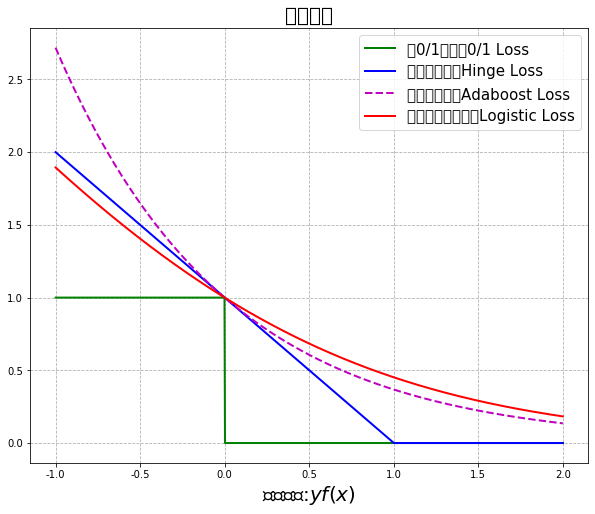

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,8))
x = np.linspace(start=-1, stop=2, num=1001, dtype=np.float)
logi = np.log(1 + np.exp(-x)) / math.log(2)
boost = np.exp(-x)
y_01 = x < 0
y_hinge = 1.0 - x
y_hinge[y_hinge < 0] = 0

plt.plot(x, y_01, 'g-', mec='k', label='（0/1损失）0/1 Loss', lw=2)
plt.plot(x, y_hinge, 'b-', mec='k', label='（合页损失）Hinge Loss', lw=2)
plt.plot(x, boost, 'm--', mec='k', label='（指数损失）Adaboost Loss', lw=2)
plt.plot(x, logi, 'r-', mec='k', label='（逻辑斯谛损失）Logistic Loss', lw=2)
plt.grid(True, ls='--')
plt.legend(loc='upper right',fontsize=15)
plt.xlabel('函数间隔:$yf(x)$',fontsize=20)
plt.title('损失函数',fontsize=20)
plt.show()


上面这个图有几点要注意:

1. logistic loss，里面的对数是2
1. 另外，这些函数在0右侧的部分，都是有值的。
1. 分类问题的损失，实现二分类任务

可以认为支持向量机、逻辑斯谛回归与最大熵模型、提升方法使用不同的代理损失函数(surrogateloas Punotion)表示分类的损失，定义经验风险或结构风险函数，实现二类分类学习任务。学习的策略是优化以下结构风险函数，

$$
\min _{f \in H} \frac{1}{N} \sum_{i=1}^{N} L\left(y_{i}, f\left(x_{i}\right)\right)+\lambda J(f)
$$

第1项为经验风险(经验损失)，第2项为正则化项，$L(y,f(x))$为损失函数，$J(f)$为模型的复杂度，$\lambda \geq 0$为系数。

支持向量机用$L_2$范数表示模型的复杂度。原始的逻辑斯谛回归与最大熵模型没有正则化项，可以给它们加上$L_2$范数正则化项。提升方法没有显式的正则化项，通常通过早停止(early stopping)的方法达到正则化的效果。

#### 二分类推广
**标注问题的条件随机场可以看成是分类问题的最大熵模型的推广**

概率模型的学习可以形式化为极大似然估计或贝叶斯估计的极大后验概率估计。学习的策略是极小化对数似然损失或极小化正则化的对数似然损失。对数似然损失可以写成：

$$-logP(y|x)$$

极大后验概率估计时，正则化项是先验概率的负对数。

决策树学习的策略是正则化的极大似然估计，损失函数是对数似然损失，正则化项是决策树的复杂度。

逻辑斯谛回归与最大熵模型、条件随机场的学习策略既可以看成是极大似然估计(或正则化的极大似然估计)，又可以看成是极小化逻辑斯谛损失(或正则化的逻辑斯谛损失)。

朴素贝叶斯模型、隐马尔可夫模型的非监督学习也是极大似然估计或极大后验概率估计，但这时模型含有隐变量。

### 4 学习算法

统计学习的问题有了具体的形式以后，就变成了最优化问题。

朴素贝叶斯法与隐马尔可夫模型的监督学习，最优解即极大似然估计值，可以由概率计算公式直接计算。

感知机、逻辑斯谛回归与最大熵模型、条件随机场的学习利用梯度下降法、拟牛顿法等一般的无约束最优化问题的解法。
支持向量机学习，可以解凸二次规划的对偶问题。有序列最小最优化算法等方法。

决策树学习是基于启发式算法的典型例子。可以认为特征选择、生成、剪枝是启发式地进行正则化的极大似然估计。

提升方法利用学习的模型是加法模型、损失函数是指数损失函数的特点，启发式地从前向后逐步学习模型，以达到逼近优化目标函数的目的。

EM算法是一种迭代的求解含隐变量概率模型参数的方法，它的收敛性可以保证，但是不能保证收敛到全局最优。

支持向量机学习、逻辑斯谛回归与最大熵模型学习、条件随机场学习是凸优化问题，全局最优解保证存在。而其他学习问题则不是凸优化问题。

----

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)